Lab 3 : Data cleaning challenge

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv(r"C:\Users\anato\Documents\IRONHACK\DAFT_1022\module_3\Lab_3_Data-Cleaning-Challenge\iris-data.csv")
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [7]:
iris.loc[iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris.loc[iris['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

In [12]:
iris['sepal_length_cm'].sort_values().tail(10)

129    7.2
125    7.2
109    7.2
107    7.3
130    7.4
105    7.6
135    7.7
118    7.7
117    7.7
131    7.9
Name: sepal_length_cm, dtype: float64

In [10]:
iris.loc[iris['sepal_length_cm'] < 1, 'sepal_length_cm'] *= 100

In [14]:
iris['sepal_width_cm'].sort_values().tail(10)

46    3.8
44    3.8
18    3.8
19    3.8
5     3.9
16    3.9
14    4.0
32    4.1
33    4.2
15    4.4
Name: sepal_width_cm, dtype: float64

In [16]:
iris['petal_length_cm'].sort_values().tail(10)

125    6.0
130    6.1
135    6.1
109    6.1
107    6.3
131    6.4
105    6.6
117    6.7
122    6.7
118    6.9
Name: petal_length_cm, dtype: float64

In [19]:
iris['petal_width_cm'].sort_values().tail(10)

140    2.4
114    2.4
109    2.5
144    2.5
100    2.5
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
Name: petal_width_cm, dtype: float64

In [20]:
iris.loc[iris['class'] == 'Iris-versicolor', 'petal_width_cm'] / iris.loc[iris['class'] == 'Iris-versicolor', 'petal_length_cm']

50    0.297872
51    0.333333
52    0.306122
53    0.325000
54    0.326087
55    0.288889
56    0.340426
57    0.303030
58    0.282609
59    0.358974
60    0.285714
61    0.357143
62    0.250000
63    0.297872
64    0.361111
65    0.318182
66    0.333333
67    0.243902
68    0.333333
69    0.282051
70    0.375000
71    0.325000
72    0.306122
73    0.255319
74    0.302326
75    0.318182
76    0.291667
77    0.340000
78    0.333333
79    0.285714
80    0.289474
81    0.270270
82    0.307692
83    0.313725
84    0.333333
85    0.355556
86    0.319149
87    0.295455
88    0.317073
89    0.325000
90    0.272727
91    0.304348
92    0.300000
93    0.303030
94    0.309524
95    0.285714
96    0.309524
97    0.302326
98    0.366667
99    0.317073
dtype: float64

In [21]:
classes = list(iris['class'].unique())
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [22]:
for cl in classes :
    mean_ratio = (iris.loc[iris['class'] == cl, 'petal_width_cm'] / iris.loc[iris['class'] == cl, 'petal_length_cm']).mean()
    print(mean_ratio)
    iris.loc[(iris['petal_width_cm'].isna()) & (iris['class'] == cl), 'petal_width_cm'] = mean_ratio * iris.loc[(iris['petal_width_cm'].isna()) & (iris['class'] == cl), 'petal_length_cm']

0.1715732387094617
0.31110617920521344
0.3683385780720734


In [23]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

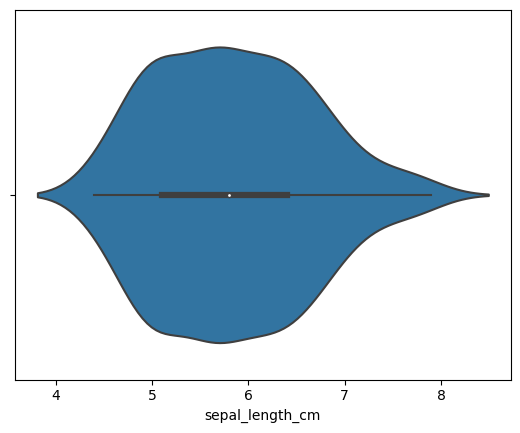

In [27]:
fig1, ax1 = plt.subplots()
sns.violinplot(x = iris['sepal_length_cm'])
plt.show()

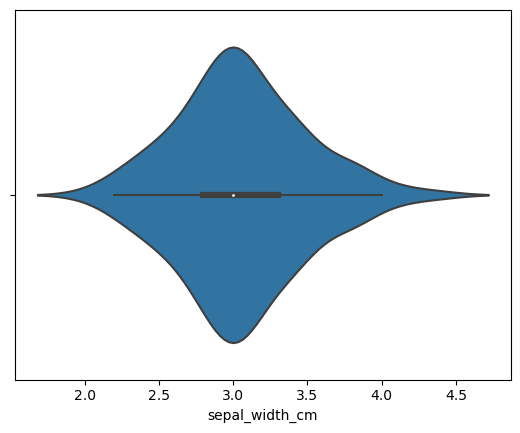

In [28]:
fig2, ax2 = plt.subplots()
sns.violinplot(x = iris['sepal_width_cm'])
plt.show()

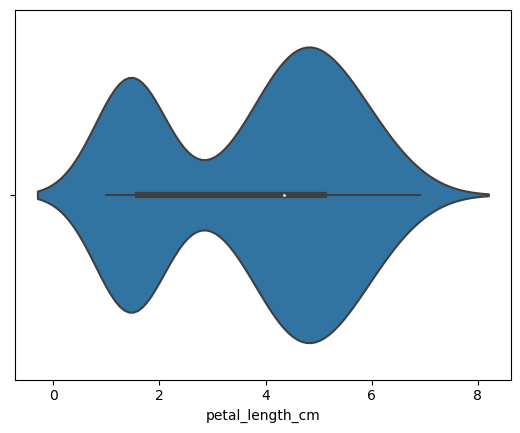

In [29]:
fig3, ax3 = plt.subplots()
sns.violinplot(x = iris['petal_length_cm'])
plt.show()

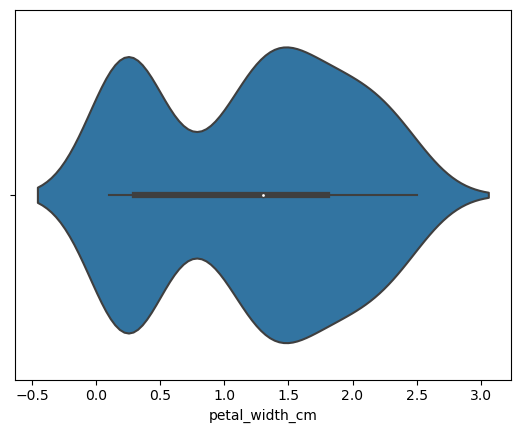

In [30]:
fig4, ax4 = plt.subplots()
sns.violinplot(x = iris['petal_width_cm'])
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [ ]:
x = iris[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
y = iris['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)